In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('../data/cancer_tumor_data_features.csv')

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_x = scaler.fit_transform(df)

In [26]:
scaled_x.mean(axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
        1.74825981e-16,  1.99801121e-16,  3.74627101e-17, -3.74627101e-17,
        1.87313551e-16,  4.52674414e-16,  2.49751401e-16, -1.03022453e-16,
       -3.49651961e-16, -1.31119486e-16,  4.40186844e-16,  1.81069766e-16,
        1.62338411e-16,  1.24875700e-17,  8.11692053e-17,  6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.74726541e-16,  2.12288691e-16])

In [27]:
cov_matrix = np.cov(scaled_x,rowvar=False)

In [28]:
eigen_values , eigen_vestors = np.linalg.eig(cov_matrix)

In [29]:
num_components = 2

In [30]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [31]:
eigen_values ,  eigen_vectors = eigen_values[sorted_key], eigen_vestors[:,sorted_key]

In [32]:
principal_components = np.dot(scaled_x,eigen_vectors)

In [33]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

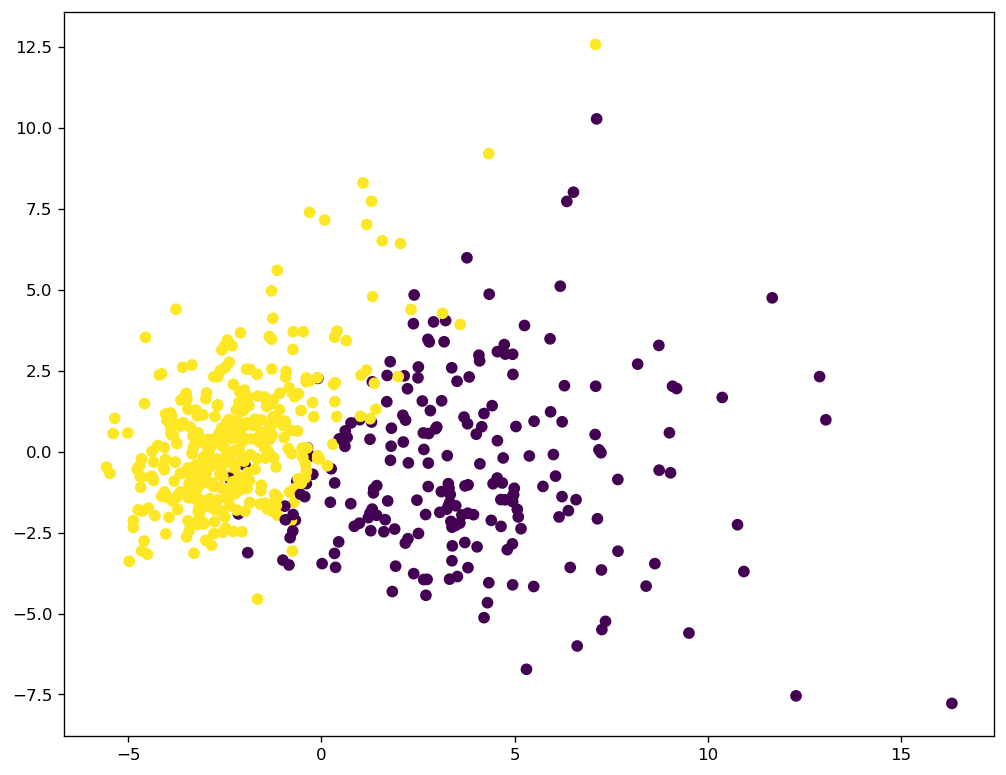

In [34]:
plt.figure(figsize=(10,8), dpi=120)
plt.scatter(principal_components[:,0],principal_components[:,1], c=cancer_dictionary['target'])

In [35]:
from sklearn.datasets import load_breast_cancer

In [36]:
cancer_dictionary = load_breast_cancer()

In [38]:
df = pd.read_csv('../data/cancer_tumor_data_features.csv')

In [37]:
scaler = StandardScaler()

In [39]:
scaled_x = scaler.fit_transform(df)

In [40]:
scaled_x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [46]:
pc_results = pca.fit_transform(scaled_x)

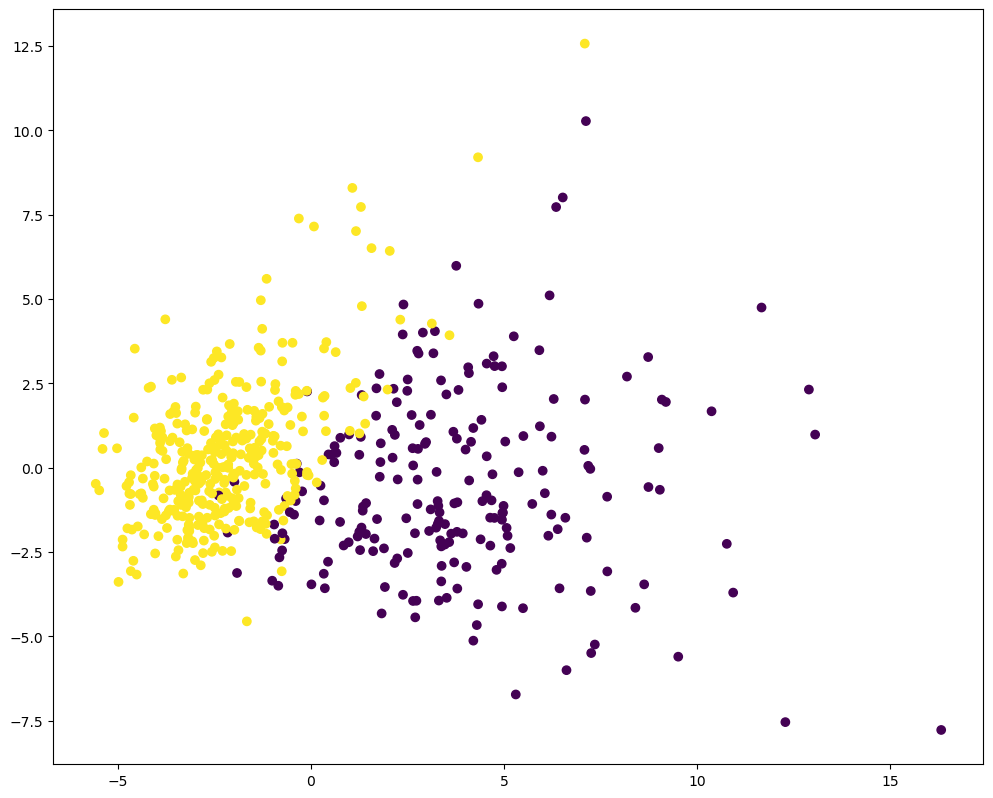

In [49]:
plt.figure(figsize=(12,10),dpi=100)
plt.scatter(pc_results[:,0],pc_results[:,1],c=cancer_dictionary['target'])

In [50]:
df_comp = pd.DataFrame(pca.components_,index=['PCA1','PCA2'],columns=df.columns)

In [51]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PCA1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PCA2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

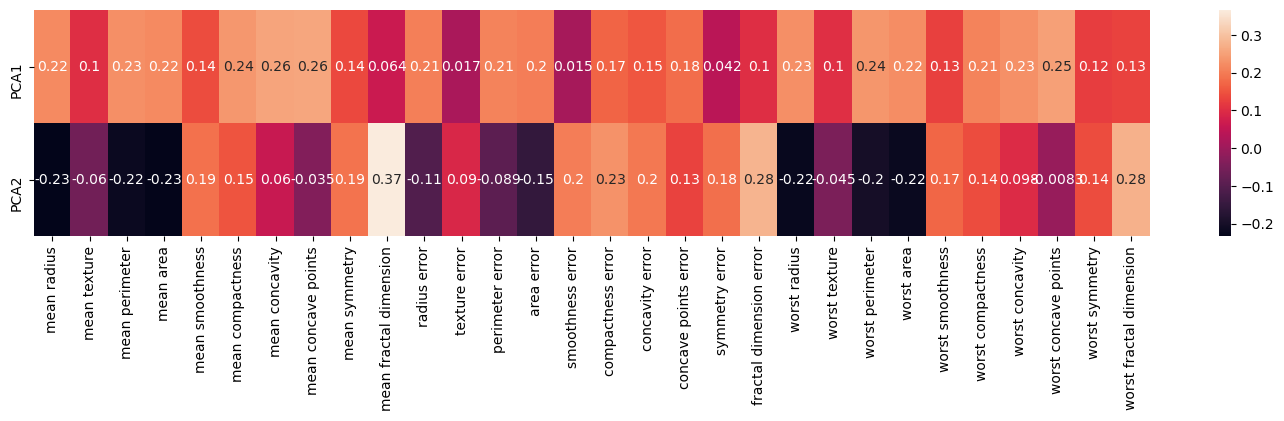

In [55]:
plt.figure(figsize=(18,3), dpi=100)
sns.heatmap(df_comp,annot=True)

In [57]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [60]:
exp_var = []

for n in range(1,30):

    pca = PCA(n_components=n)
    pca.fit(scaled_x)

    exp_var.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'variance explained')

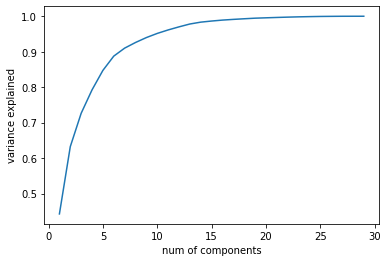

In [62]:
plt.plot(range(1,30), exp_var)
plt.xlabel('num of components')
plt.ylabel('variance explained')